# Data Challenge Project Work CO2

## 1. Introduction

###### Ka Men Ho, Luana Aido da Silva, Michèle Pfister

The project explores the performance of machine learning (ML) algorithms for the prediction and diagnosis of heart disease. As heart disease remains one of the leading causes of mortality worldwide, in this data challenge project we aim to understand, how early detection strategies can be improved using these tools, which have the potential to enhance patient outcomes and reduce disease-related mortality (Alshenawy, 2024).

The underlying biological mechanisms of heart attacks and strokes involve obstruction of blood flow to the heart or brain due to arterial plaque accumulation or thrombus formation. A major clinical challenge is that symptoms of heart disease are often nonspecific, overlapping with those of other conditions or being misattributed to normal aging, which complicates preventive and accurate diagnosis (Quah et al., 2014).

Machine learning has become an increasingly important tool in healthcare, enhancing clinical decision-making in disease prediction and diagnosis. Traditional approaches relied largely on practitioners’ interpretation of a patient’s medical history, reported symptoms, and physical examination findings (Karthick et al., 2022).

The dataset used in this project was obtained from the University of California Irvine (UCI) Machine Learning Repository and is widely employed for heart disease prediction tasks. Patient outcomes were determined using cardiac catheterization, considered the clinical gold standard, where individuals exhibiting more than 50% narrowing of a coronary artery were classified as having heart disease.
The dataset comprises 270 patient records and includes 13 independent predictive variables. Detailed descriptions of these attributes are provided in the UCI repository documentation (University of California, Irvine, n.d.)

An updated version of the heart disease dataset includes 303 consecutive patients referred for coronary angiography at the Cleveland Clinic in Cleveland, Ohio, between May 1981 and September 1984. This cohort was used to develop the Cleveland algorithm, a computerized diagnostic model whose regression coefficients were later validated using independent patient populations from Budapest, Long Beach, and Switzerland.
The Cleveland cohort had a mean age of 54 years, consisted of 68% men, and showed a disease prevalence of 46%. The model was derived from 13 clinical and test-related variables, with age, sex, chest pain type, and systolic blood pressure identified as key predictors. Chest pain was categorized as typical anginal, atypical anginal, nonanginal, or asymptomatic, and inclusion of age, sex, and chest pain type was required for clinically relevant disease probability estimation.

Because complete joint distributions of clinical variables were rarely available, the original model assumed independence among predictors. However, previous research has shown that ignoring interdependencies between symptoms can result in overconfident predictions and inaccurate disease probability estimates (Detrano et al., 1989). 

To mitigate the overconfidence that can arise from assuming independence among clinical variables, the study of Kathleen employs an ensemble learning approach using the Adaptive Boosting (AdaBoost) algorithm. AdaBoost is a meta-learning method that combines multiple weak classifiers into a single, more robust predictive model. Through 100 iterative boosting rounds, the algorithm adaptively increases the weight of observations that were misclassified in previous iterations, encouraging subsequent classifiers to focus on complex or interacting symptom patterns that are difficult to capture with a single model. The final prediction is produced via a weighted majority vote of all component classifiers, resulting in a classifier that is less prone to overconfident assumptions and better aligned with the true diagnostic outcome (Kathleen et al., 2016).

Alshenawy (2024) evaluated several machine learning algorithms, both individually and in ensemble settings, to identify reliable approaches for heart disease diagnosis. The models analyzed included Support Vector Machines, Random Forest, Decision Trees, Naïve Bayes, and Logistic Regression as a baseline. The data were divided into training (189 observations) and testing (81 observations) sets, and model performance was assessed using multiple metrics, including accuracy, sensitivity, specificity, and AUC.

Among the individual models, Random Forest achieved the highest overall performance, while ensemble approaches using bagging produced comparable but not superior results. Building on this framework, the data challenge project work CO2 applies a similar comparative evaluation of multiple machine learning models, with particular emphasis on ensemble methods, to assess their effectiveness in heart disease prediction.


### Table of contents

- 1. Introduction

- 2. Exploratory data analysis
- 2. 1 Importing Libraries and load the data
- 3. Preprocessing
- 3. 1 Cleaning the data 
- 3. 2 Handling missing values
- 3. 3 Converting text labels to numbers (feature encoding)
- 4. Modelling
- 4. 1 symple base-line model
- 4. 2 two sophisticated model approaches
- 4. 3 Experiment and testing the model
- 5. Results
- 6. Discussion


## 2. Exploratory data analysis

Analyse your data. Visualise and explain the data features you deem to be relevant for
the project.

### 2.1 Importing Libraries and load data

In [ ]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns


heart_data = pd.read_csv("Heart_Disease_Prediction.csv")

heart_data.head()


(270, 15)

## 2.1 Data Dictionary
1. **age:** age in years (Numeric)
2. **sex:** biological gender of the patient (Categorical)
3. **chest pain type:** the type of chest pain experienced by the patient (Categorical)
4. **BP:** blood pressure level of the patient (Numeric)
5. **cholesterol:** cholesterol level of the patient (Numeric)
6. **FBS over 120:** fasting blood sugar test results over 120 mg/dl (Categorical)
7. **EKG results:** electrocardiogram results of the patient (Categorical)
8. **Max HR:** maximum heart rate levels achieved during exercise testing (Numeric)
9. **Excercise angina:** angina experienced during exercise testing ( Categorical)
10. **ST depression:** ST depression on an Electrocardiogram (Numeric)
11. **Slope of ST:** The slope of ST segment electrodiagram readings (Categorical)
12. **Number of vessles fluro:** amount of vessels seen in Fluoroscopy images ( Categorical)
13. **Thallium:** Thallium Stress test findings (Categorical)
14. **Heart Disease:** Whether or not the patient has been diagnosed with Heart Disease (Categorical)

### Categorial features documenation:
**1. Sex:**

    0 = female 
    
    1 = male

**2. chest pain type:** 

    1 = typical angina

    2 = atypical angina

    3 = non-anginal pain

    4 = asymptomatic

**3. FBS over 120:**

    0 = no

    1 = yes

**4. EKG results:**

    0 = normal

    1 = having ST-T wave abnormality

    2 = showing probable or definite left ventricular hyperthrophy

**5. Excercise induced angina:**

    0 = no

    1 = yes

**6. Slope of ST:**

    1 = upslopong

    2 = flat

    3 = downsloping

**7. Number of vessles fluro:**

    Range of values from 1 to 3

**8. Thalium:**

    3 = normal

    6 = fixed

    7 = reversable defect

*source: https://archive.ics.uci.edu/dataset/45/heart+disease*


In [ ]:
heart_data.shape
heart_data.dtypes
heart_data.isna().sum()
heart_data.isnull().sum()
heart_data.duplicated().sum()
heart_data.info()

This dataset contains vital insight of 270 patients. Each patient is identified by 13 indipendent varibles, which can be seen as 13 different featurest for further analysis. There are no null or nan values found in the dataset. There is also no duplicates in the values. As the goal is to predict if someone gets a heart disease, the feature heart disease is our target variable, which is categorical, so it needs to be encoded.

In [ ]:
heart_data.describe().T.round(2)
#.T makes that the features are written down as columns
# The values where rounded to two decimal values after point

#etwas noch zur Varianz

In [ ]:

#countplot for only the presence or absence of heart disease
disease_plot = sns.countplot(x="Heart Disease", data=heart_data)


for container in disease_plot.containers:
    disease_plot.bar_label(container)

plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Distribution of Heart Disease")
plt.show()

There are 120 patients with a heart disease and 150 patient dont show a presence of heart disease. 

In [ ]:

#Distribution of all the varibles

# Create a new dataframe with all the features except the target feature
data = heart_data.loc[:, ~heart_data.columns.isin(["Heart Disease"])]

# Find the number of variables in the dataframe
num_vars =  len(data.columns)

# Calculate the number of rows and columns needed for the grid of subplots
num_rows = (num_vars // 2) + (num_vars % 2)
num_cols = 3

# Grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()


for i, col in enumerate(data.columns):
    sns.histplot(data[col], bins=50, ax=axes[i], color="steelblue")
    axes[i].set_title(f"{col} Distribution")
    axes[i].grid(alpha=0.35)

for j in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.suptitle("Histograms for each feature", fontsize=20)
plt.tight_layout()
plt.show()


In [ ]:
#boxplot von wichtigen Variablen von denen man auch weiss dass die eine verbindung zu heart disease
features = ["Age", "Max HR", "ST depression"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

for ax, feature in zip(axes, features):
    sns.boxplot(
        x="Heart Disease",
        y=feature,
        data=heart_data,
        ax=ax
    )
    ax.set_title(feature)




In [ ]:
cat_features = ["Sex", "Chest pain type", "Exercise angina"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, feature in zip(axes, cat_features):
    sns.countplot(
        x=feature,
        hue="Heart Disease",
        data=heart_data,
        ax=ax)
    
    for container in ax.containers:
        ax.bar_label(container, padding=2)

    ax.set_title(feature)


#noch female und male in plot

## 3. Preprocessing

Explain what kind of preprocessing, feature encoding you are applying

## 3.1 Cleaning the data


In [29]:
#drop the 'id' column
heart_data = heart_data.drop(columns=['index'])

## 3.2 Converting text labels to number (feature encoding)

In [30]:
y = heart_data.pop("Heart Disease")

In [31]:
# Target encoding for absence and presence of heart disease
encoder = preprocessing.LabelEncoder()
label_encoder = encoder.fit_transform(y)
print(label_encoder)

[1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1
 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 0 1 1 0 1 0 0 0 0 1]


## 3.2 Converting text labels to numbers (feature encoding)

In [32]:
# we change the percentage of train datasets
train_X, test_X, train_y, test_y = train_test_split(heart_data, y, train_size = 0.70, random_state = 1)

validation_X, test_X, validation_y, test_y = train_test_split(test_X, test_y, test_size = 0.5, random_state = 1)

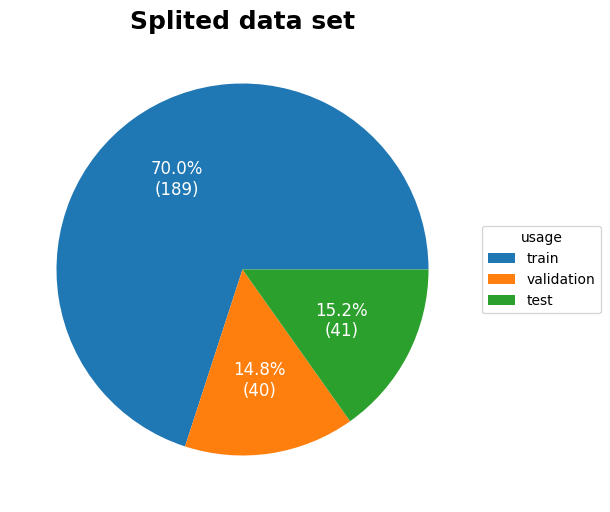

In [33]:
# count length
train_length = len(train_X)
validation_length = len(validation_X)
test_length = len(test_X)

# prepare for matplotlip
length = [train_length,validation_length,test_length]
label = ["train","validation","test"]

# plotting
fig, ax = plt.subplots(figsize=(6, 8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


wedges, texts, autotexts = ax.pie(length, autopct=lambda pct: func(pct, length),
                                  textprops=dict(color="w"))

ax.legend(wedges, label,
          title= "usage",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12)

ax.set_title("Splited data set", size = 18, weight = "bold")

plt.show()

dictionary --> 1 Presence, 2 Absence

## 3.3 Split Train, Validation and Test dataset

In [19]:
# we change the percentage of train datasets
train_X, test_X, train_y, test_y = train_test_split(heart_data, y, train_size = 0.70, random_state = 1)

validation_X, test_X, validation_y, test_y = train_test_split(test_X, test_y, test_size = 0.5, random_state = 1)

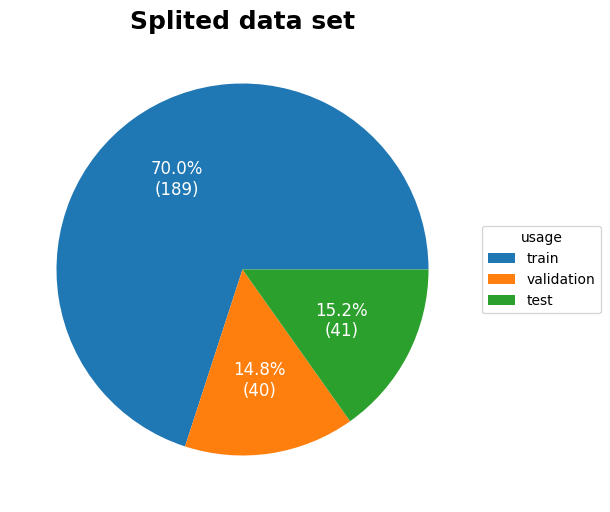

In [20]:
# count length
train_length = len(train_X)
validation_length = len(validation_X)
test_length = len(test_X)

# prepare for matplotlip
length = [train_length,validation_length,test_length]
label = ["train","validation","test"]

# plotting
fig, ax = plt.subplots(figsize=(6, 8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


wedges, texts, autotexts = ax.pie(length, autopct=lambda pct: func(pct, length),
                                  textprops=dict(color="w"))

ax.legend(wedges, label,
          title= "usage",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12)

ax.set_title("Splited data set", size = 18, weight = "bold")

plt.show()

## 3.4 Introducing new feature

In [11]:
# new feature: if hypertension ordinal, groupe age groupe


## 4. Modelling

### 4. 1 symple base-line model

perfect model setup for baseline: Logicstic regression

is interpretable, medically standard and easy to explain coefficients

In [12]:
# line model 

### 4. 2 two sophisticated model approaches

number 1 random forest: captures feature interactions, non linear splits, robust on small datasets

numeber 2 Gradient Boosting or SVM (RBF)


#### Sources

Alshenawy, F. (2024). Using Machine Learning Algorithms to improve heart disease diagnoses. المجلة العلمية للدراسات والبحوث المالية والتجارية, 5(1), 417–442. https://doi.org/10.21608/cfdj.2024.324103

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J.-J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology, 64(5), 304–310. https://doi.org/10.1016/0002-9149(89)90524-9

Kathleen, H., H., J., & J., G. (2016). Diagnosing Coronary Heart Disease using Ensemble Machine Learning. International Journal of Advanced Computer Science and Applications, 7(10). https://doi.org/10.14569/IJACSA.2016.071004

Karthick, K., Aruna, S. K., & Manikandan, R. (2022). Development and evaluation of the bootstrap resampling technique based statistical prediction model for Covid-19 real time data : A data driven approach. Journal of Interdisciplinary Mathematics, 25(3), 615–627. https://doi.org/10.1080/09720502.2021.2012890

Quah, J. L. J., Yap, S., Cheah, S. O., Ng, Y. Y., Goh, E. S., Doctor, N., Leong, B. S.-H., Tiah, L., Chia, M. Y. C., & Ong, M. E. H. (2014). Knowledge of Signs and Symptoms of Heart Attack and Stroke among Singapore Residents. BioMed Research International, 2014, 1–8. https://doi.org/10.1155/2014/572425

University of California, Irvine. (n.d.). Heart disease data set. UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease